# Scraping y Parsing de Datos

In [4]:
import requests
from bs4 import BeautifulSoup
from pprint import pprint

# Url es el sitio web que se va a scrapear
url = "https://listado.mercadolibre.com.mx/iphone#D[A:iphone]"

data = requests.get(url)

# Se imprime la información del sitio web
print(data.text)


<!DOCTYPE html>
<html lang="es-MX">
<head><link rel="preconnect" href="https://www.google-analytics.com"/><link rel="preconnect" href="https://www.google.com"/><link rel="preconnect" href="https://data.mercadolibre.com"/><link rel="preconnect" href="https://http2.mlstatic.com"/><link rel="preconnect" href="https://stats.g.doubleclick.net"/><link rel="preconnect" href="https://analytics.mercadolibre.com.mx"/><link rel="preconnect" href="https://analytics.mercadolibre.com"/><link rel="preconnect" href="https://www.google.com.mx"/><script type='text/javascript' nonce="12llh2IDdo6Cge+nlFktrA==">window.NREUM||(NREUM={});NREUM.info = {"agent":"","beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"NRBR-766f4fb616d3a2368ce","applicationID":"1729522169","agentToken":null,"applicationTime":548.799133,"transactionName":"bgQDMEcFXkJZBkYNWldOJBxFFlVCSw9BS3J8NU5LHw==","queueTime":0,"ttGuid":"fc6e61d70659ebc2"}; (window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:true},aja

In [11]:
#headers = {
    #"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.11 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9",
    #"Accept-Encoding": "identity"
#}

headers = {
    "Access-Control-Allow-Origin": "*",
    "Access-Control-Allow-Methods": "GET",
    "Access-Control-Allow-Headers": "Content-Type",
    "Access-Control-Max-Age": "3600",
    "User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0"
}

url = "https://listado.mercadolibre.com.mx/phone#D[A:phone]"

response = requests.get(url, headers=headers)

print(response.content[0:1000])

b'\n<!DOCTYPE html>\n<html lang="es-MX">\n<head><link rel="preconnect" href="https://www.google-analytics.com"/><link rel="preconnect" href="https://www.google.com"/><link rel="preconnect" href="https://data.mercadolibre.com"/><link rel="preconnect" href="https://http2.mlstatic.com"/><link rel="preconnect" href="https://stats.g.doubleclick.net"/><link rel="preconnect" href="https://analytics.mercadolibre.com.mx"/><link rel="preconnect" href="https://analytics.mercadolibre.com"/><link rel="preconnect" href="https://www.google.com.mx"/><script id="__LOADABLE_REQUIRED_CHUNKS__" type="application/json">[6593,84,7824,5710,3981,8304,6813,9222,7095,2061,8912,3671,2235,6544,7811,3312,4181,8668,8888,4871,2937,709,2065,8884,322,3003,9137,4651,8892,7593,8379]</script><script id="__LOADABLE_REQUIRED_CHUNKS___ext" type="application/json">{"namedChunks":["pages-search-components-views-main-main-desktop","chunk-listing-disclaimer"]}</script>\n<meta charSet="utf-8"/>\n<meta http-equiv="X-UA-Compatible

In [13]:
# Un ejemplo simple con BeautifulSoup
url = "https://listado.mercadolibre.com.mx/phone#D[A:phone]"
data = requests.get(url, headers)

html = BeautifulSoup(data.text, 'lxml')

for item in html.select('.ui-search-layout__item'):
    try:
        print('---------------------------')
        title = item.select('h2')[0].get_text()
        
        print(title)
    except Exception as e:
        # raise e
        print('')

---------------------------
Xiaomi Poco C65 Dual SIM 256 GB azul 8 GB RAM
---------------------------
Nothing Phone (2a) Dual SIM 256 GB negro 12 GB RAM
---------------------------
Xiaomi Poco C65 Dual SIM 128 GB negro 6 GB RAM
---------------------------
Nothing Phone 2 Dual SIM 512 GB negro 12 GB RAM
---------------------------
Nothing Phone (1) Dual SIM 256 GB black 8 GB RAM
---------------------------
Asus ROG Phone 8 Pro Dual SIM 512 GB negro 16 GB RAM
---------------------------
Xiaomi Redmi Note 13 4G Dual SIM 256 GB negro 8 GB RAM
---------------------------
Nothing Phone (2) 5g 256 Gb 12 Gb Color Black
---------------------------
Celular Doogee N55 4gb 128gb Android 14 Robusto Smartphone 6.56  Hd+ Pantalla 90hz Memoria Expandida 1 Tb
---------------------------
Celular Ulefone Armor 24 Rugged Smartphone Dual Sim 12gb + 256gb 22000mah Black
---------------------------
Samsung Galaxy A15 5G Dual SIM 128 GB blue black 6 GB RAM
---------------------------
Xiaomi Pocophone Poco M6 

In [21]:
# Ahora se hace un ejemplo con el mismo sitio de Mercado Libre
# Además se explica cómo obtener la información de cada tarjeta
import numpy as np
url = "https://listado.mercadolibre.com.co/inmuebles/apartamentos/venta/bogota-dc/"
data = requests.get(url, headers)

html = BeautifulSoup(data.text, 'lxml')
# Genera las listas para la información del sitio web
arr_price = []
arr_dpt_size = []
arr_num_habs = []
arr_location = []
i = 0

for item in html.select('.ui-search-layout__item'):
    try:
        price = item.select('span.andes-money-amount')[0].get_text()
        dpt_size = item.select('li.ui-search-card-attributes__attribute')[2].get_text()
        num_habs = item.select('li.ui-search-card-attributes__attribute')[0].get_text()
        location = item.select('span.ui-search-item__location-label')[0].get_text()
        
        # Asigna los valores del sitio web a las listas correspondientes
        arr_price += [price]
        arr_dpt_size += [dpt_size]
        arr_num_habs += [num_habs]
        arr_location += [location]
    except Exception as e:
        raise e
        # print('')

In [25]:
arr_location

['Carrera 58b #129a-23, Bogotá, Colo...',
 'Carrera 58b #129a-23, Bogotá, Colo...',
 'Chicó Navarra, Usaquén, Bogotá D.c.',
 'Calle 20a #96-71, Bogotá, Colombia...',
 'Carrera 67 #169a-82, Bogotá, Colom...',
 'Diagonal 77b #120a-45, Engativá, C...',
 'Carrera 58b #129a-23, Bogotá, Colo...',
 'Calle 143a #128-51, Bogotá, Colomb...',
 'Carrera 55a #163-35, Bogotá, Colom...',
 'Britalia, Suba, Bogotá D.c.',
 'Transversal 60 #59-24, Bogotá, Col...',
 'Alcazar Del Rio, Calle 166 #8h-20,...',
 'Calle 187 #55b-90, Bogotá, Colombi...',
 'Carrera 118 Bis #89a-26, Bogotá, C...',
 'Cl 167 #73-45, Bogotá, Colombia, C...',
 'Cra. 58 #138-50, Bogotá, Colombia,...',
 'Cra. 88 #67, Bogotá, Colombia, Nue...',
 'Cra 19 #51-53, Bogotá, Colombia, A...',
 'Calle 35 Sur #26-35, Bogotá, Colom...',
 'Santa Bárbara Central, Usaquén, Bo...',
 'Carrera 39b #4-20, Bogotá, Colombi...',
 'La Cabrera, Chapinero, Bogotá D.c.',
 'Los Cedros, Usaquén, Bogotá D.c.',
 'Calle 21 #81b-30, Bogotá, Colombia...',
 'Tv 120, Bo

In [26]:
# Se generan los datos en un archivo CSV
import csv
# Importar la función 'os' para leer el directorio actual
import os

os.chdir('/users/memobarbosa/Análisis de datos/Parte 2/M15 - Interacción con Datos de la Web')

# Abre el archivo donde se guardarán las listas
resultFile = open("mercadolibre.csv", "w")

# Write data to file
for i in range(0, len(arr_dpt_size)):
    resultFile.write(arr_price[i] + "," + arr_dpt_size[i] + "," + arr_num_habs[i] + "," + arr_location[i] + "\n")
resultFile.close()

In [29]:
# Reemplazo strings con enteros
new_arr_price = []
for price in arr_price:
    new_price = price.replace(".", "")
    new_price = new_price.replace("$", "")
    new_arr_price.append(int(new_price))

print(new_arr_price)

[430000000, 385000000, 630000000, 340000000, 441200000, 296800000, 410000000, 165300000, 352900000, 330000000, 359000000, 258400000, 282500000, 196600000, 430000000, 510000000, 350000000, 255000000, 190000000, 550000000, 408000000, 4924345497, 900000000, 282600000, 380000000, 265000000, 346500000, 270000000, 270000000, 110000000, 190000000, 650000000, 200000000, 330000000, 168000000, 200000000, 175000000, 170000000, 530000000, 600000000, 180000000, 188000000, 540000000, 180000000, 175000000, 178000000, 390000000, 180000000]


<BarContainer object of 48 artists>

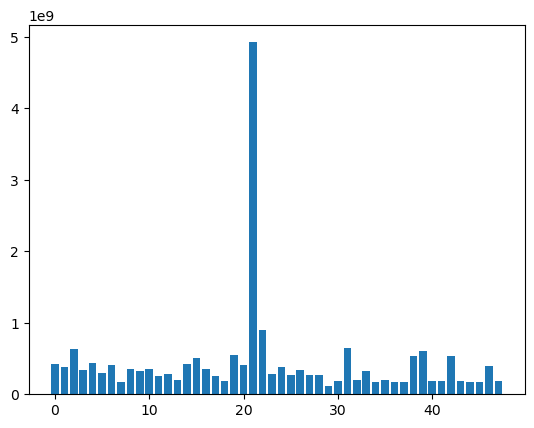

In [30]:
import matplotlib.pyplot as plt
plt.bar(range(len(new_arr_price)), new_arr_price)